<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
import pandas as pd

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
diamond =  pd.read_csv('diamond_data.csv')
diamond.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [19]:
diamond.shape

(1547, 9)

Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
diamond.table.skew()

0.6890334163767503

In [4]:
import numpy as np
((diamond.table)**(1/3)).skew()

0.5924854264654669

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
diamond.columns

Index(['carat', 'cut', 'color', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [13]:
# type your code here
import statsmodels.api as sm
from statsmodels.api import OLS
diam1 = diamond[['carat','depth', 'table', 'price','x', 'y', 'z']]
diam = diam1.iloc[:,[0,1,2,3,4,5,6]]
x = diam.drop('price', axis=1)
x = sm.add_constant(x)
y = diam.price
model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1807.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:16:52   Log-Likelihood:                -13458.
No. Observations:                1547   AIC:                         2.693e+04
Df Residuals:                    1540   BIC:                         2.697e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3505.1570   8768.887     -0.400      0.689   -2.07e+04    1.37e+04
carat       1.242e+04    393.765     31.534      0.000    1.16e+04    1.32e+04
depth        218.3451    139.567      1.564      0.118     -55.417     492.107
table        -92.6874     17.743     -5.224      0.000    -127.491     -57.884
x          -1285.0437    916.743     -1.402      0.161   -3083.240     513.153
y           3188.3480   1048.173      3.042      0.002    1132.351    5244.345
z          -6071.2183   2294.675     -2.646      0.008   -1.06e+04   -1570.201
==============================================================================
Omnibus:                      532.716   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5229.960
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                      11.614   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Durbin-Watson:	1.950, hence we conclude that since DW < 2, hence we say it has +ve correlation in errors.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here

X = diamond.drop(['cut', 'color','price'], axis=1)
y = diamond.price

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

pred_lr = lr.fit(X,y).predict(X)

rfe = RFE(estimator = LinearRegression(), 
          n_features_to_select=2)

newinput = rfe.fit(X,y)
colnos = rfe.get_support(indices = True)
print(X.iloc[:, colnos].columns)
print('These columns are giving the highest accuracy to the model.')

Index(['carat', 'x'], dtype='object')
These columns are giving the highest accuracy to the model.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
from sklearn.model_selection import KFold
n=4
kf = KFold(n_splits=n, shuffle = True)


df = diamond.drop(['price','cut','color'], axis = 1)
y = diamond.price

from sklearn.metrics import r2_score

# Function to calc R2Score
def r2scores(model, x_train, y_train, x_test,y_test):
    pred_model = model.fit(x_train, y_train).predict(x_test)
    return(r2_score(y_test,pred_model))

# K Fold CV

scores = []
lrfit = LinearRegression()

for i in range(n):
    results = next(kf.split(df)) # can see what all folds are generated using list func.
    xtrain = df.iloc[results[0]]
    xtest = df.iloc[results[1]]
    ytrain = y.iloc[results[0]]
    ytest = y.iloc[results[1]]
    scores.append(r2scores(lrfit, xtrain, ytrain, xtest, ytest))
    
# Print all the Scores
print("All Scores", np.round(scores,4))

# Print the Min Score
print("\nMin Score", np.round(np.min(scores), 4))

# MaxScore
print("MaxScore", np.round(np.max(scores), 4))

# Average & SD Score
print("Avg Score", np.round(np.mean(scores), 4))
print("SD Score", np.round(np.std(scores), 4))

All Scores [0.8883 0.8764 0.8797 0.8996]

Min Score 0.8764
MaxScore 0.8996
Avg Score 0.886
SD Score 0.009


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
import matplotlib.pyplot as plt
np.abs(model.params[1:]).sort_values().plot(kind = "barh")
plt.show()

The most insignificant features are depth, table, somehow x & y.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
import scipy.stats as  st
st.shapiro(model.resid)

Residuals are not normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

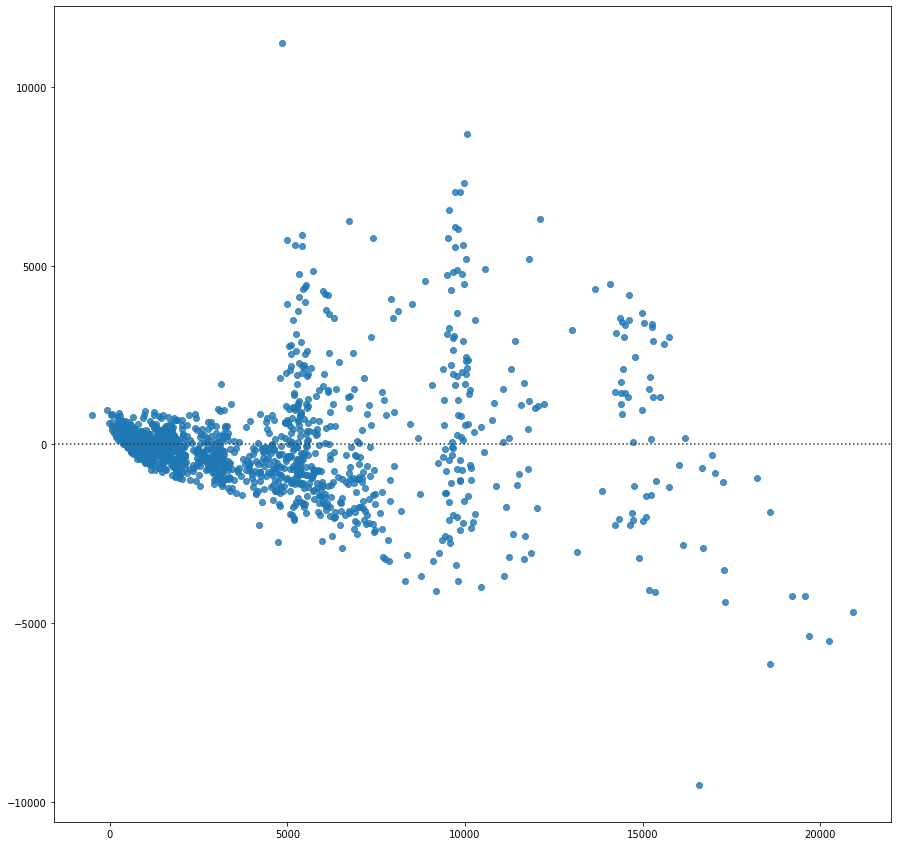

In [16]:
# type your code here
import seaborn as sns ; import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15,15]

res = model.resid ; fit = model.fittedvalues

sns.residplot(fit, res)
plt.show()

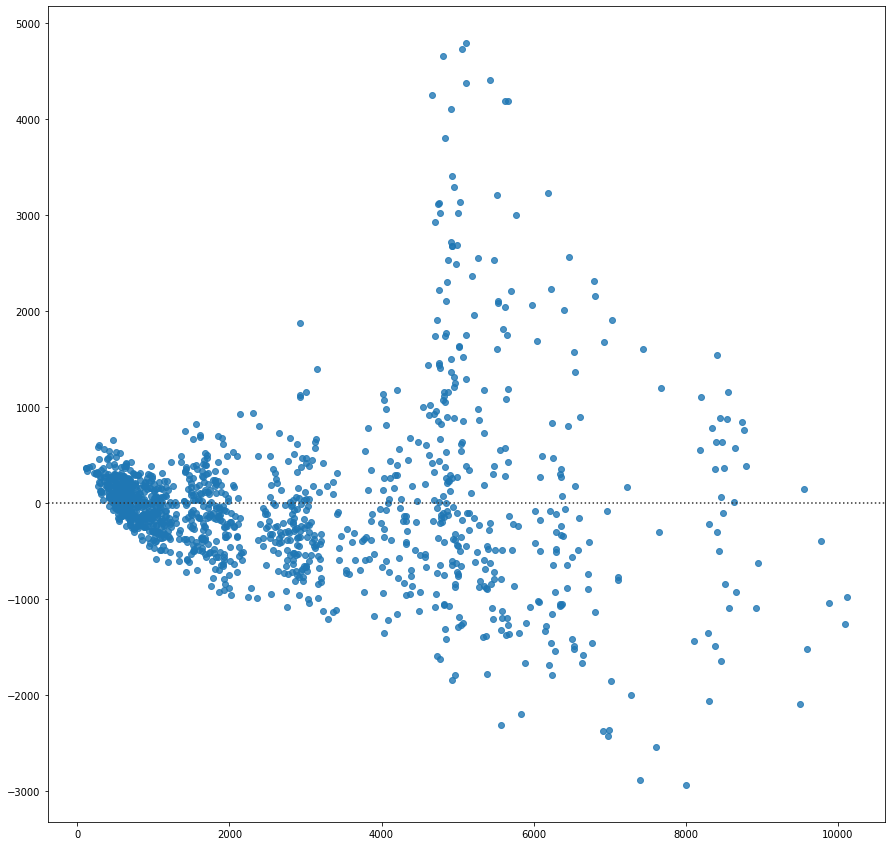

In [28]:
Q1 = diamond.quantile(0.25) ; Q3 = diamond.quantile(0.75) ; IQR = Q3-Q1
diamond1 = diamond[~((diamond<Q1-1.5*IQR) | (diamond>Q3+1.5*IQR)).any(axis=1)]

Q11 = diamond1.quantile(0.25) ; Q31 = diamond1.quantile(0.75) ; IQR1 = Q31-Q11
diamond2 = diamond1[~((diamond1<Q11-1.5*IQR1) | (diamond1>Q31+1.5*IQR1)).any(axis=1)]

import statsmodels.api as sm
from statsmodels.api import OLS
diam1 = diamond2[['carat','depth', 'table', 'price','x', 'y', 'z']]
diam = diam1.iloc[:,[0,1,2,3,4,5,6]]
x = diam.drop('price', axis=1)
x = sm.add_constant(x)
y = diam.price
model1 = OLS(y,x).fit()

plt.rcParams['figure.figsize'] = [15,15]
import seaborn as sns ; import matplotlib.pyplot as plt
res = model1.resid ; fit = model1.fittedvalues
sns.residplot(fit, res)
plt.show()

### We will remove outliers from the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

pred_lr = lr.fit(X,y).predict(X)

rfe = RFE(estimator = LinearRegression(), 
          n_features_to_select=7)

newinput = rfe.fit(X,y)
colnos = rfe.get_support(indices = True)
print(X.iloc[:, colnos].columns)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here
diamond.color.unique()

array(['F', 'H', 'J', 'E', 'D', 'G', 'I'], dtype=object)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

pred_lr = lr.fit(X,y).predict(X)

rfe = RFE(estimator = LinearRegression(), 
          n_features_to_select=5)

newinput = rfe.fit(X,y)
colnos = rfe.get_support(indices = True)
print(X.iloc[:, colnos].columns)

Index(['carat', 'depth', 'x', 'y', 'z'], dtype='object')
